**Goal**: automatically synch the three tracks:
1. video frames
2. snapshots (VSCode plugin)
3. eye tracker fixations

In [1]:
from eye_tracking_utils import read_textual_snapshot
from eye_tracking_utils import get_textual_snapshot_at
from eye_tracking_utils import find_closest_snapshot_ts
from eye_tracking_utils import is_perfect_match

In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
VIDEO_PATH = "../participants/UconsumerU/video_export_07-26-22-15.10.45_UconsumerU 0.avi"
USER_NAME = "UconsumerU"
USER_FOLDER = f"../participants/{USER_NAME}"
TASK_NUMBER = 0

## Via Snapshot Data

In [11]:
user_folder = f"../participants/{USER_NAME}"
df_snap = read_textual_snapshot(user_folder)
record = get_textual_snapshot_at(df_snap, time_ms=52889600)
content = "".join(record["content_lines"]).replace("\t", "    ")

tmp_dir.name:  ./tmp/tmpccy33pn2


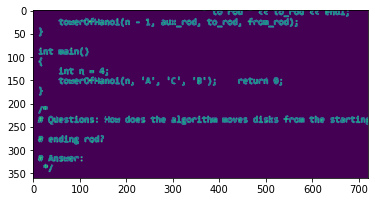

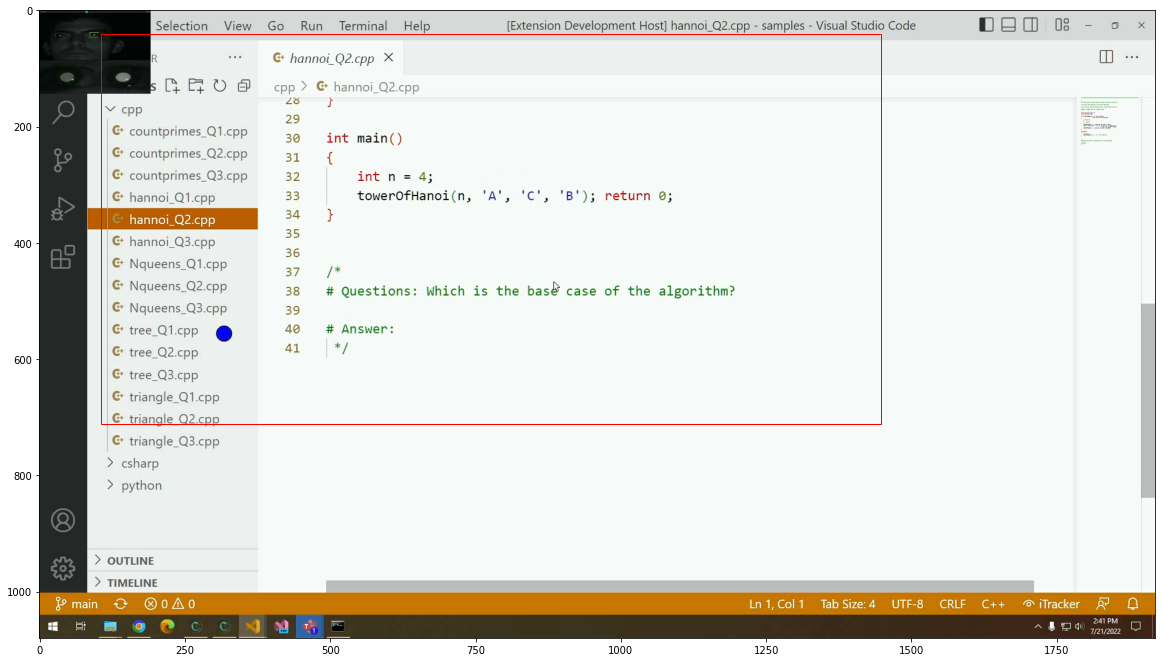

tmp_dir.name:  ./tmp/tmpl1ck2std


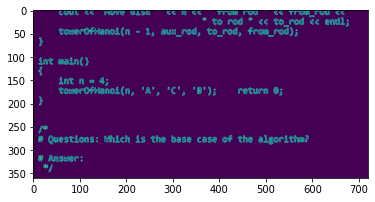

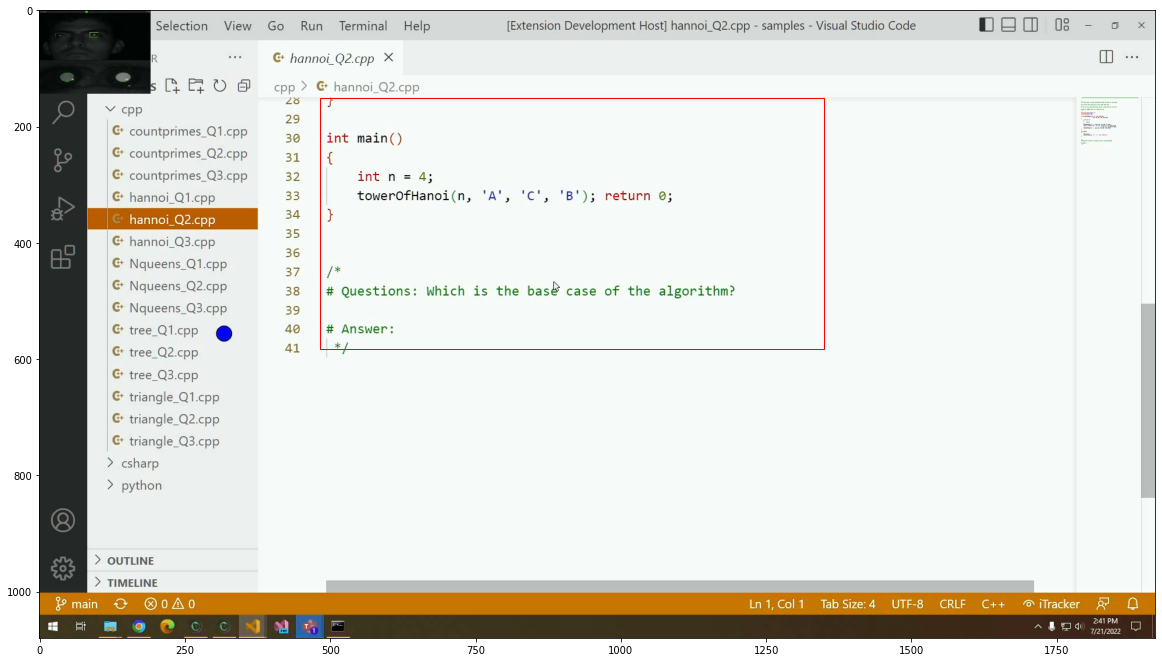

tmp_dir.name:  ./tmp/tmpfsueyit2


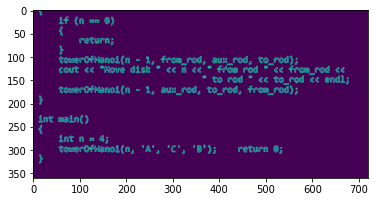

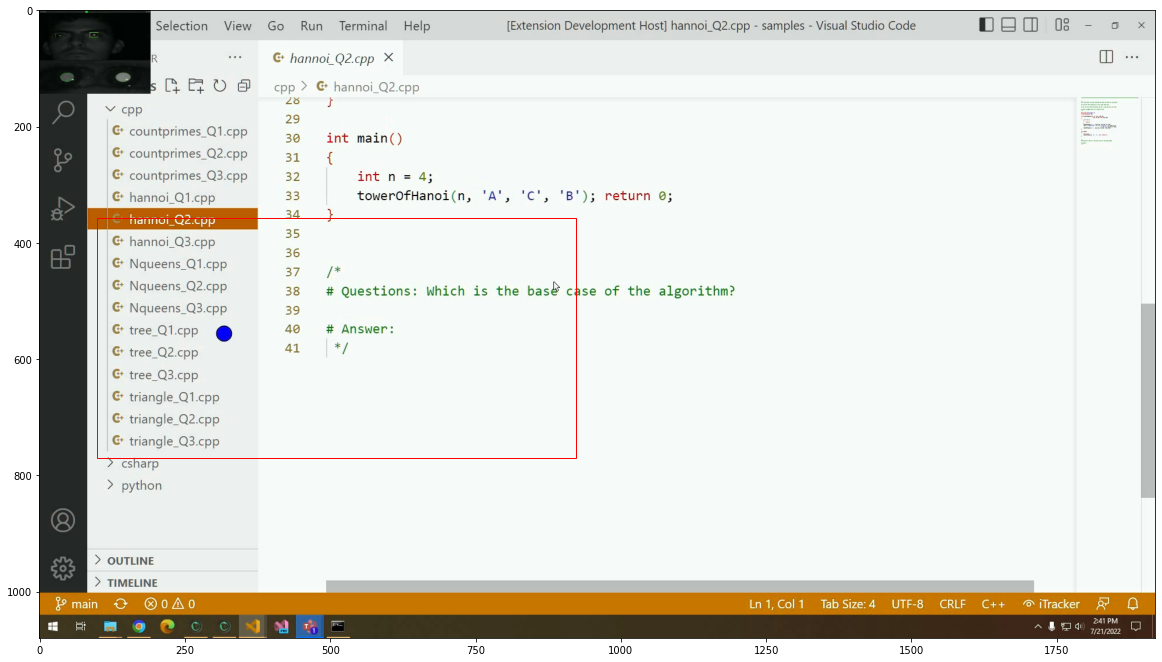

tmp_dir.name:  ./tmp/tmpg9v0tk72


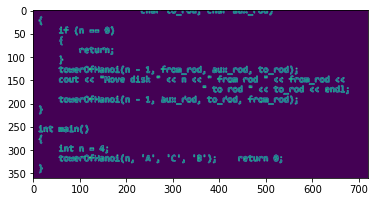

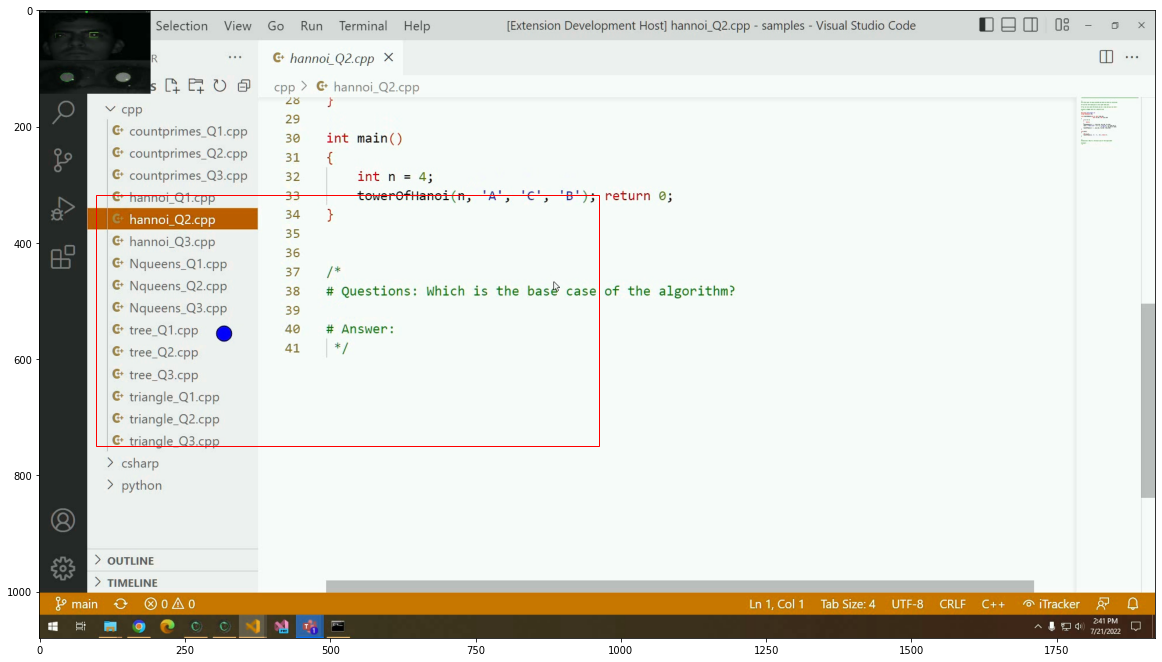

tmp_dir.name:  ./tmp/tmpean9ri7m


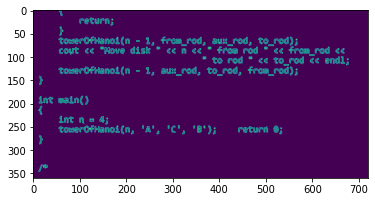

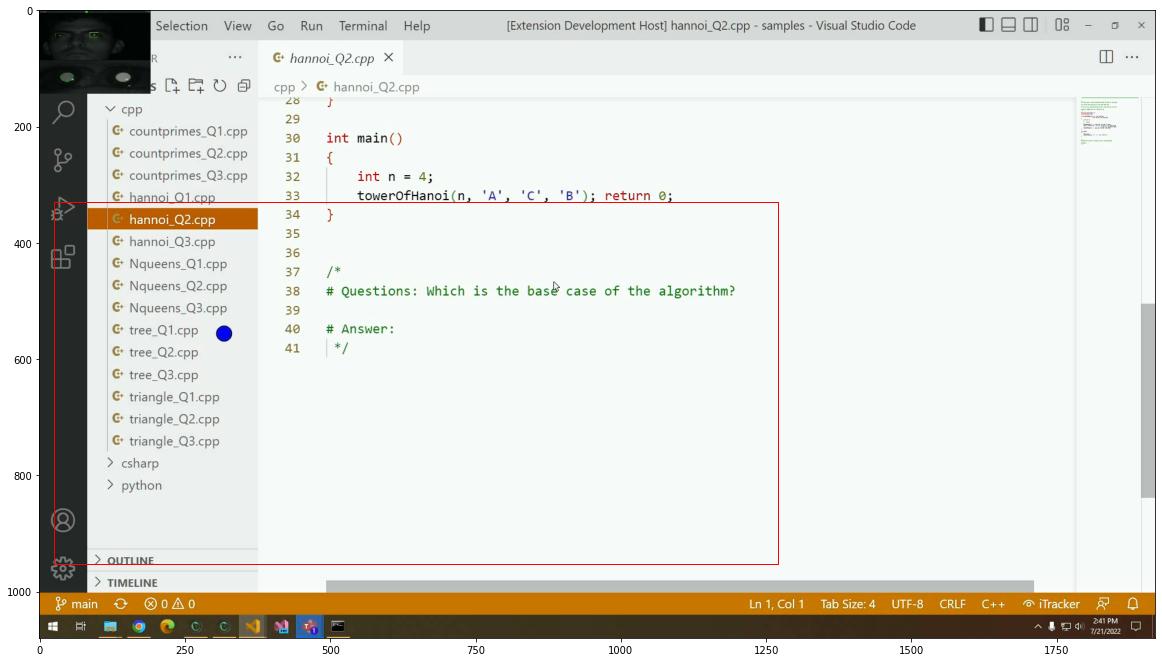

tmp_dir.name:  ./tmp/tmpvpk8hzf4


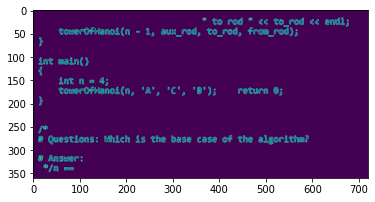

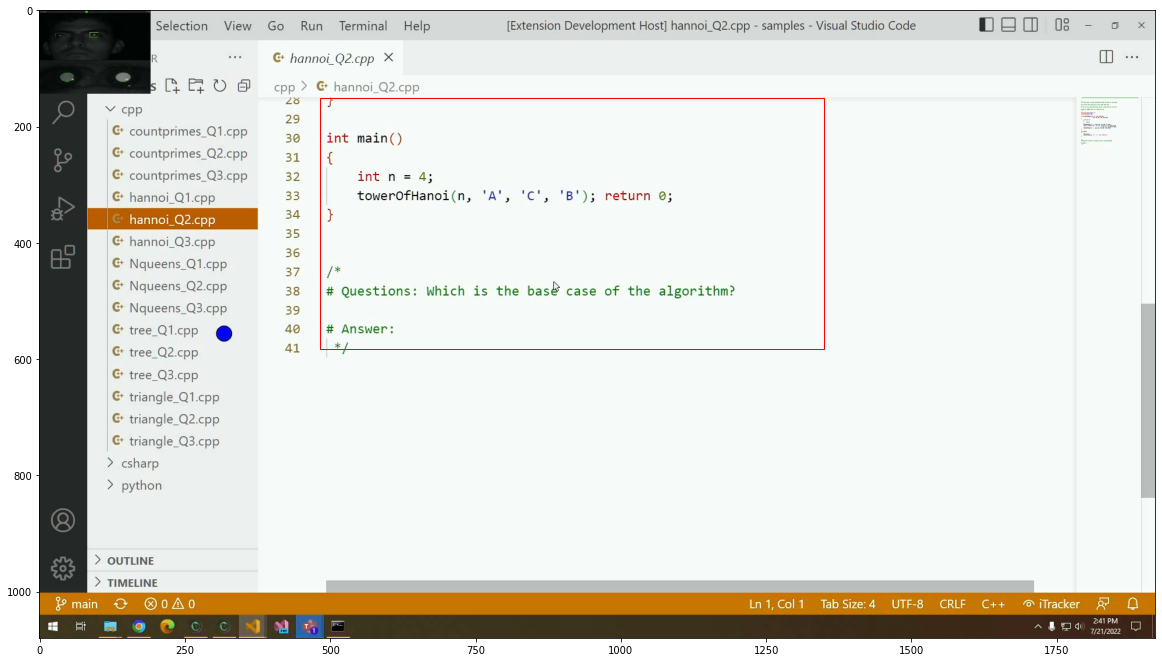

tmp_dir.name:  ./tmp/tmpo_4pg2fi


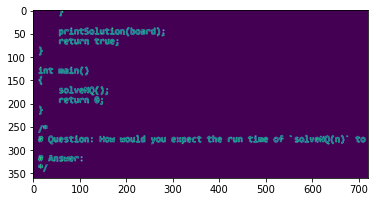

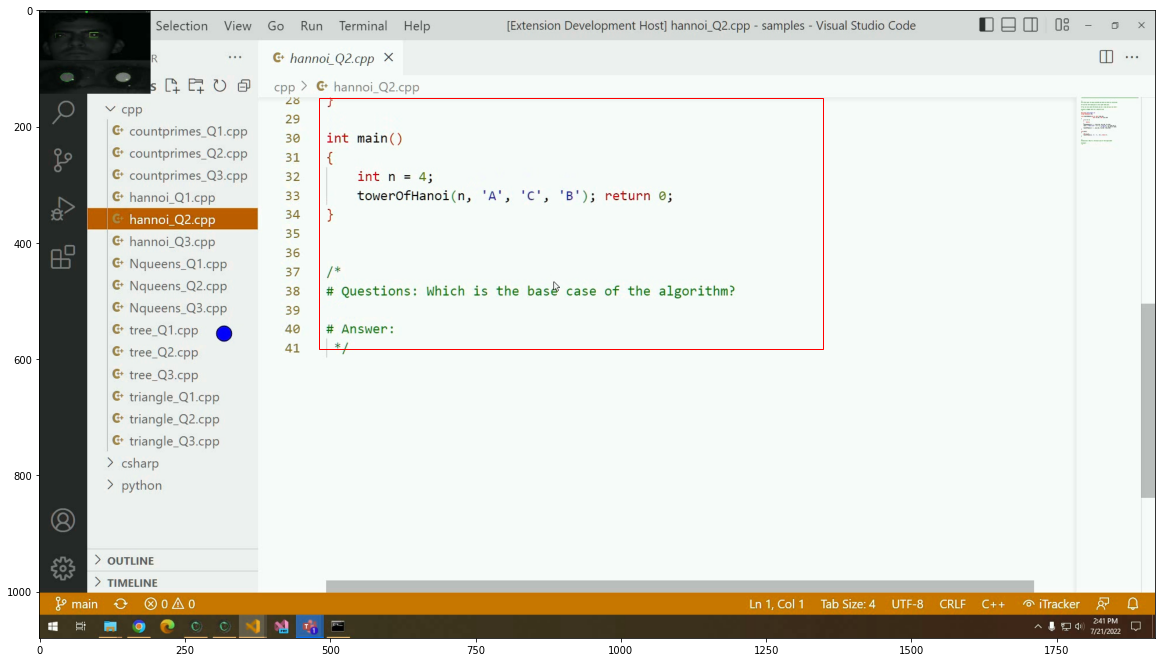

52858779.0

In [12]:
closest_candidates = find_closest_snapshot_ts(
    video_path=VIDEO_PATH,
    video_ts_ms=120000,
    df_text_snapshots=df_snap,
    guess_ts_ms=52889600,
    n_checks=10,
    x_code_coord=0,
    debug=True
)

closest_candidates


In [15]:
closest_candidates

52858779.0

## Via Eye-Tracker Data


In [16]:
from eye_tracking_utils import read_eye_tracker_fixations
from eye_tracking_utils import inspect_x_y_position
from eye_tracking_utils import get_x_y_pos_of_eye

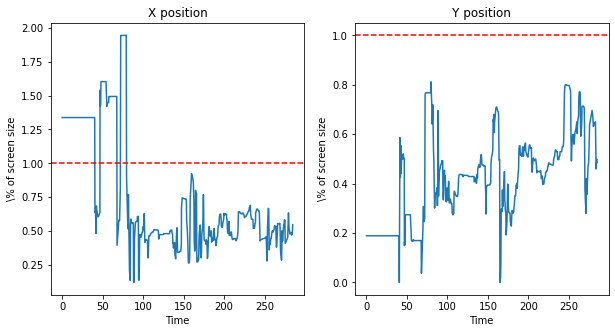

In [17]:
df_eye = read_eye_tracker_fixations(
    user_folder=USER_FOLDER, task_nr=TASK_NUMBER)

inspect_x_y_position(
    df_eye,
    time_col="FPOGS",
    x_col="CX",
    y_col="CY")


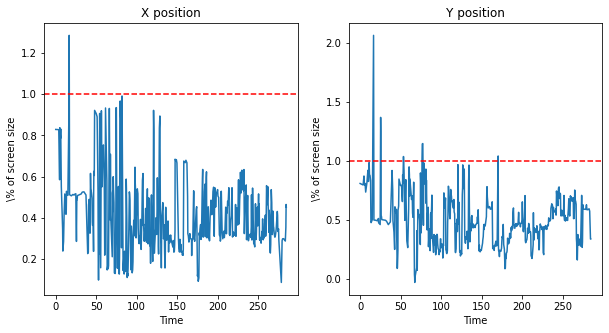

In [18]:
import matplotlib.pyplot as plt

inspect_x_y_position(
    df_eye,
    time_col="FPOGS",
    x_col="FPOGX",
    y_col="FPOGY")

In [23]:
df_eye_tracker = get_x_y_pos_of_eye(
    video_path=VIDEO_PATH,
    stop_after_n_frames=30,
    #debug=True
)



100%|██████████| 30/30 [00:14<00:00,  2.13it/s]


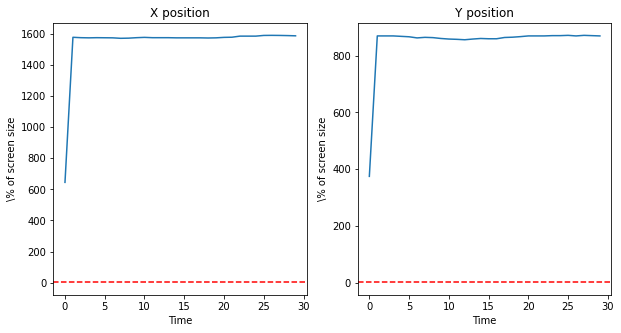

In [24]:
inspect_x_y_position(
    df_eye_tracker,
    time_col="frame_number",
    x_col="x",
    y_col="y")